In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [3]:
cd Desktop

C:\Users\nehag\OneDrive - University of Calgary\Desktop


In [4]:
dataset = pd.read_csv('MRI_DATA.csv')
dataset

,Measure:volume,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age
0,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.648,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85
1,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.660,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85
2,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.597,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86
3,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.604,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87
4,/home/harshal.patel/freesurfer/ADNI_002_S_0295...,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.597,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,/home/maheen.hossain/freesurfer/sub-CC722542_T1w,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.457,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79
4222,/home/maheen.hossain/freesurfer/sub-CC722651_T1w,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.497,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79
4223,/home/maheen.hossain/freesurfer/sub-CC722891_T1w,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.407,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84
4224,/home/maheen.hossain/freesurfer/sub-CC723197_T1w,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.700,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80


array([[<AxesSubplot:title={'center':'Left-Lateral-Ventricle'}>,
        <AxesSubplot:title={'center':'Left-Inf-Lat-Vent'}>,
        <AxesSubplot:title={'center':'Left-Cerebellum-White-Matter'}>,
        <AxesSubplot:title={'center':'Left-Cerebellum-Cortex'}>],
       [<AxesSubplot:title={'center':'Left-Thalamus'}>,
        <AxesSubplot:title={'center':'Left-Caudate'}>,
        <AxesSubplot:title={'center':'Left-Putamen'}>,
        <AxesSubplot:title={'center':'Left-Pallidum'}>],
       [<AxesSubplot:title={'center':'3rd-Ventricle'}>,
        <AxesSubplot:title={'center':'4th-Ventricle'}>,
        <AxesSubplot:title={'center':'Brain-Stem'}>,
        <AxesSubplot:title={'center':'Left-Hippocampus'}>],
       [<AxesSubplot:title={'center':'Left-Amygdala'}>,
        <AxesSubplot:title={'center':'CSF'}>,
        <AxesSubplot:title={'center':'Left-Accumbens-area'}>,
        <AxesSubplot:title={'center':'Left-VentralDC'}>],
       [<AxesSubplot:title={'center':'Left-vessel'}>,
        <AxesS

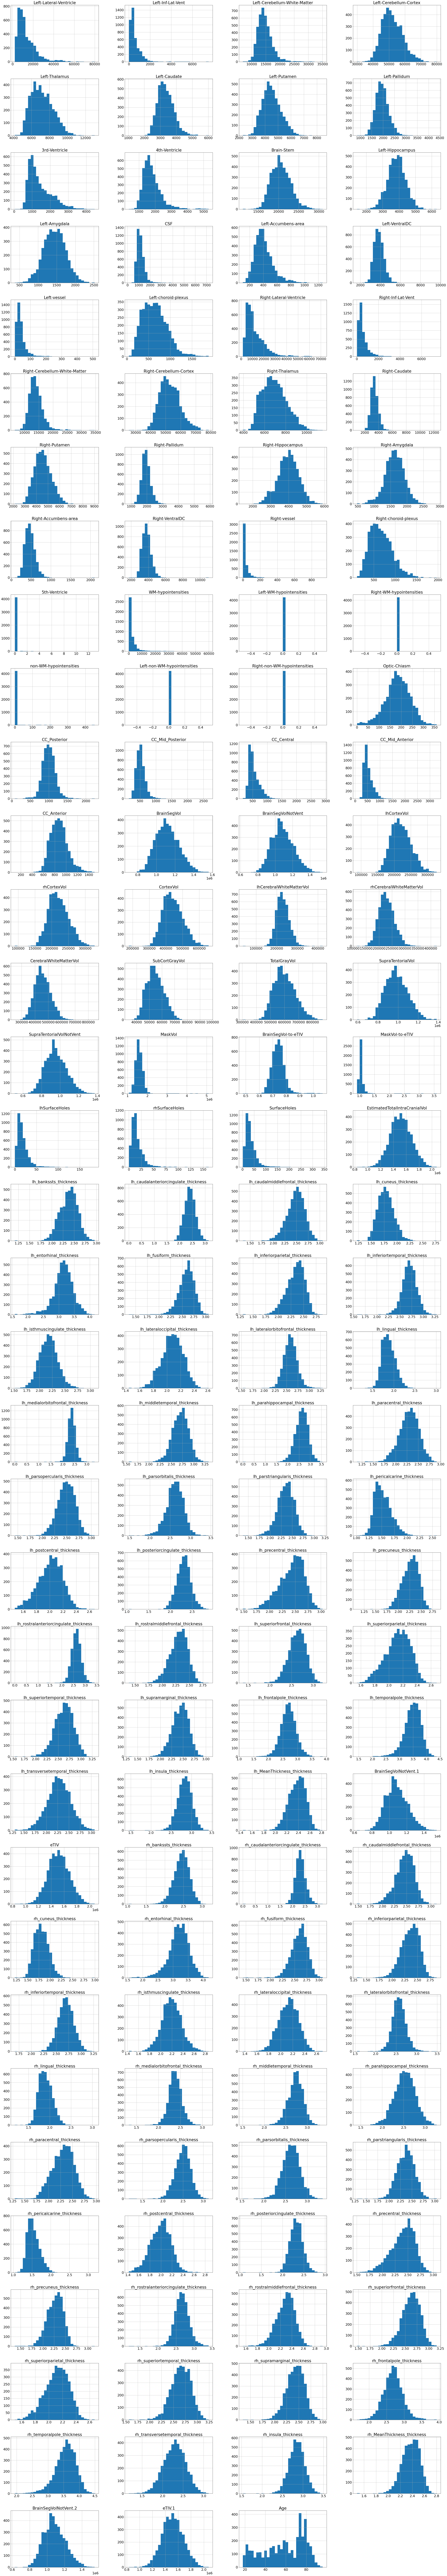

In [5]:
#Histogram of all feautures
plt.rcParams.update({'font.size': 22})
dataset.hist(figsize=(50,350),bins=30, layout=(40,4))

In [6]:
#Checking the division dataset wise
ADNI = dataset[dataset["Measure:volume"].str.contains("/ADNI")]    #1
a = ADNI.shape[0]
NORMATIVE = dataset[dataset["Measure:volume"].str.contains("/NORM")]  #2
b = NORMATIVE.shape[0]
human_connectome = dataset[dataset["Measure:volume"].str.contains("/B_HC")]  #3
c = human_connectome.shape[0]
BRAINDEV = dataset[dataset["Measure:volume"].str.contains("/IXI")]  #4
d = BRAINDEV.shape[0]
OASIS = dataset[dataset["Measure:volume"].str.contains("/OAS1")]  #5
e = OASIS.shape[0]
PARKINSON = dataset[dataset["Measure:volume"].str.contains("/sub-control")]  #6
f = PARKINSON.shape[0]
CALGCAMP = dataset[dataset["Measure:volume"].str.contains("/CC0")]  #7
g = CALGCAMP.shape[0]
SOUTHWESTERN = dataset[dataset["Measure:volume"].str.contains("/sub-031")]  #8
h = SOUTHWESTERN.shape[0]
CAMCAN = dataset[dataset["Measure:volume"].str.contains("/sub-CC")]  #9
i = CAMCAN.shape[0]

print(a+b+c+d+e+f+g+h+i)


4226


In [7]:
dataset['dataset']=0

In [8]:
#Adding new column to data with dataset number based on source of data
dataset.loc[dataset["Measure:volume"].str.contains("/ADNI"), 'dataset'] = 1
dataset.loc[dataset["Measure:volume"].str.contains("/NORM"), 'dataset'] = 2
dataset.loc[dataset["Measure:volume"].str.contains("/B_HC"), 'dataset'] = 3
dataset.loc[dataset["Measure:volume"].str.contains("/IXI"), 'dataset'] = 4
dataset.loc[dataset["Measure:volume"].str.contains("/OAS1"), 'dataset'] = 5
dataset.loc[dataset["Measure:volume"].str.contains("/sub-control"), 'dataset'] = 6
dataset.loc[dataset["Measure:volume"].str.contains("/CC0"), 'dataset'] = 7
dataset.loc[dataset["Measure:volume"].str.contains("/sub-031"), 'dataset'] = 8
dataset.loc[dataset["Measure:volume"].str.contains("/sub-CC"), 'dataset'] = 9


In [9]:
dataset['dataset'].value_counts()

1    1220
9     651
4     560
8     494
5     435
2     425
7     359
3      47
6      35
Name: dataset, dtype: int64

Text(0.5, 1.0, 'CAMCAN')

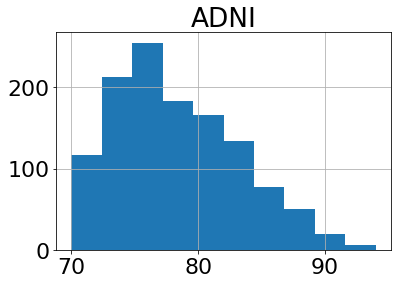

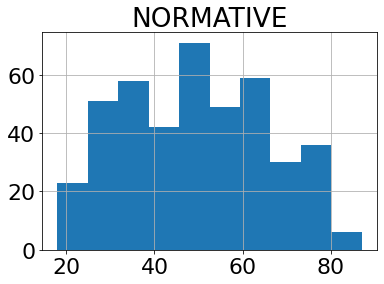

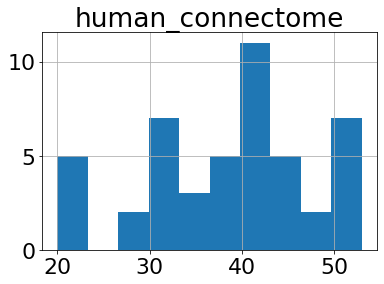

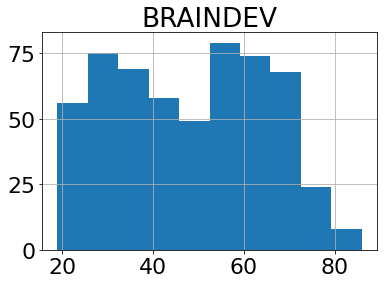

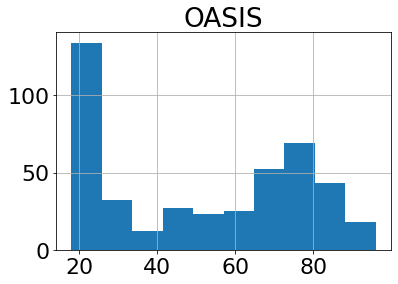

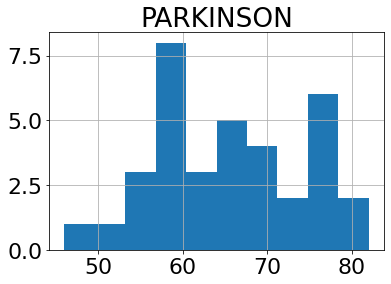

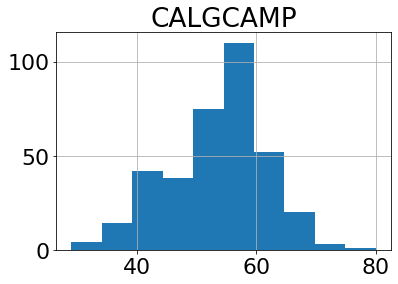

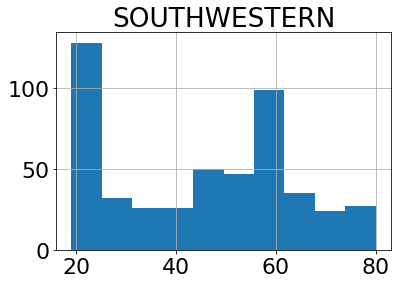

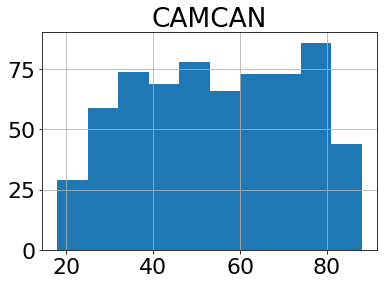

In [30]:
ADNI.hist('Age')
plt.title('ADNI')
NORMATIVE.hist('Age')
plt.title('NORMATIVE')
human_connectome.hist('Age')
plt.title('human_connectome')
BRAINDEV.hist('Age')
plt.title('BRAINDEV')
OASIS.hist('Age')
plt.title('OASIS')
PARKINSON.hist('Age')
plt.title('PARKINSON')
CALGCAMP.hist('Age')
plt.title('CALGCAMP')
SOUTHWESTERN.hist('Age')
plt.title('SOUTHWESTERN')
CAMCAN.hist('Age')
plt.title('CAMCAN')


In [31]:
X = dataset.iloc[:, 1:139].values
X

array([[2.29169000e+04, 9.82700000e+02, 1.51967000e+04, ...,
        2.33635000e+00, 1.09384600e+06, 1.61960297e+06],
       [2.29532000e+04, 9.84500000e+02, 1.52897000e+04, ...,
        2.34202000e+00, 1.09987600e+06, 1.62475513e+06],
       [2.33204000e+04, 1.06210000e+03, 1.53821000e+04, ...,
        2.31982000e+00, 1.09799900e+06, 1.62260952e+06],
       ...,
       [3.44679000e+04, 1.65960000e+03, 1.27445000e+04, ...,
        2.19622000e+00, 1.03335700e+06, 1.60432335e+06],
       [3.16275000e+04, 1.33440000e+03, 1.58832000e+04, ...,
        2.43580000e+00, 1.07333900e+06, 1.62089180e+06],
       [1.48794000e+04, 7.04200000e+02, 1.13466000e+04, ...,
        2.43420000e+00, 9.92086000e+05, 1.51307604e+06]])

In [32]:
y = dataset.iloc[:, 139].values
y

array([85, 85, 86, ..., 84, 80, 86], dtype=int64)

In [33]:
groups = dataset['dataset'].values.tolist()

In [ ]:
'''
lm = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='mean_absolute_error', cv=folds)
scores   
'''

LINEAR REGRESSION
-----------------------------------------------------------
Test dataset is: 1 & test set size: 1220 

Intercept: 108.78660773667826
R_square score on the training: 0.82
Mean squared error: 79.60
Mean absolute error: 7.10
Root mean squared error: 8.92
R_square score on test: -2.45
R_square score on test - model.score: -2.45


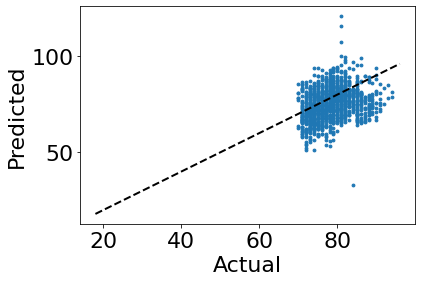

-----------------------------------------------------------
Test dataset is: 9 & test set size: 651 

Intercept: 132.61890078671328
R_square score on the training: 0.87
Mean squared error: 571.10
Mean absolute error: 7.77
Root mean squared error: 23.90
R_square score on test: -0.66
R_square score on test - model.score: -0.66


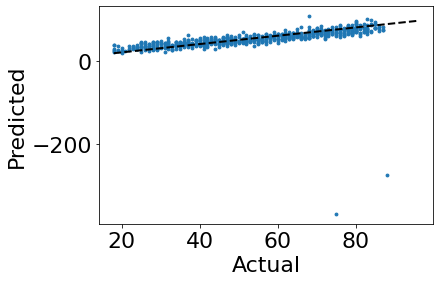

-----------------------------------------------------------
Test dataset is: 4 & test set size: 560 

Intercept: 92.64625283693655
R_square score on the training: 0.87
Mean squared error: 80.33
Mean absolute error: 7.00
Root mean squared error: 8.96
R_square score on test: 0.71
R_square score on test - model.score: 0.71


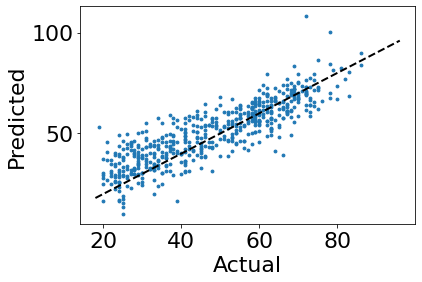

-----------------------------------------------------------
Test dataset is: 8 & test set size: 494 

Intercept: 99.89974988733456
R_square score on the training: 0.86
Mean squared error: 72.67
Mean absolute error: 6.84
Root mean squared error: 8.52
R_square score on test: 0.76
R_square score on test - model.score: 0.76


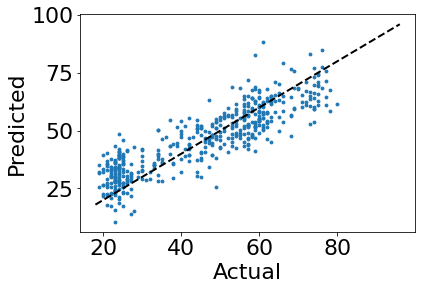

-----------------------------------------------------------
Test dataset is: 5 & test set size: 435 

Intercept: 80.54382176246406
R_square score on the training: 0.86
Mean squared error: 147.08
Mean absolute error: 9.92
Root mean squared error: 12.13
R_square score on test: 0.77
R_square score on test - model.score: 0.77


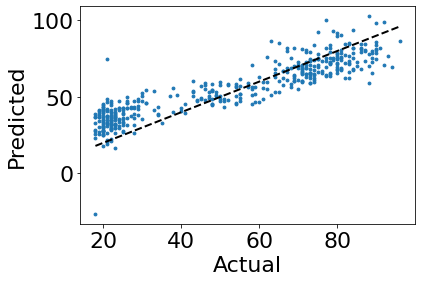

-----------------------------------------------------------
Test dataset is: 2 & test set size: 425 

Intercept: 96.76892410858905
R_square score on the training: 0.86
Mean squared error: 59.52
Mean absolute error: 6.12
Root mean squared error: 7.71
R_square score on test: 0.79
R_square score on test - model.score: 0.79


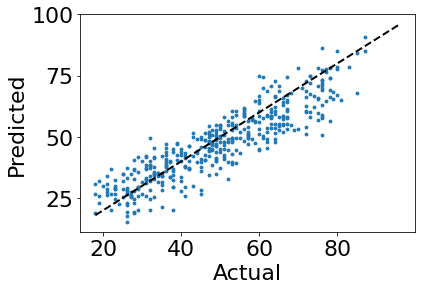

-----------------------------------------------------------
Test dataset is: 7 & test set size: 359 

Intercept: 98.40251461842863
R_square score on the training: 0.87
Mean squared error: 68.21
Mean absolute error: 6.67
Root mean squared error: 8.26
R_square score on test: -0.11
R_square score on test - model.score: -0.11


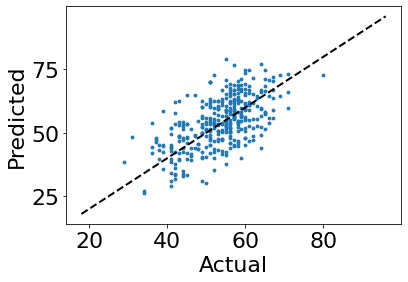

-----------------------------------------------------------
Test dataset is: 3 & test set size: 47 

Intercept: 103.44253540769323
R_square score on the training: 0.86
Mean squared error: 164.22
Mean absolute error: 10.20
Root mean squared error: 12.81
R_square score on test: -1.06
R_square score on test - model.score: -1.06


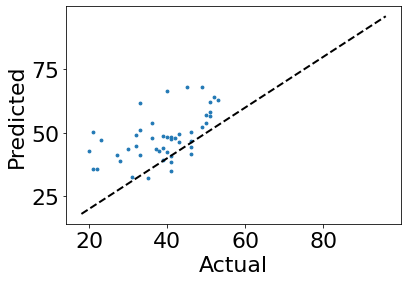

-----------------------------------------------------------
Test dataset is: 6 & test set size: 35 

Intercept: 94.90870011206943
R_square score on the training: 0.86
Mean squared error: 41.05
Mean absolute error: 5.21
Root mean squared error: 6.41
R_square score on test: 0.44
R_square score on test - model.score: 0.44


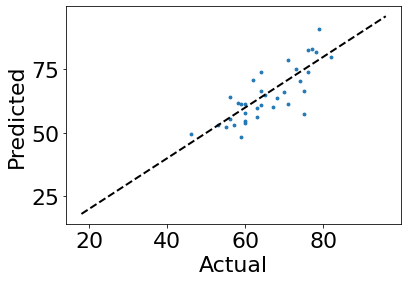

Average K-Fold Score : -0.09168108578609094
Average K-Fold MAE Score : 7.4247867556985705
SD of MAE Score : 1.558363211491789


In [90]:
print('LINEAR REGRESSION')
scores = []
MAE = []
std_lr=[]
from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=9)
for train_index, test_index in gkf.split(X, y, groups=groups):
    #print("TRAIN:", train_index,train_index.shape, "TEST:", test_index, test_index.shape)
    print('-----------------------------------------------------------')
    print('Test dataset is:', dataset.iloc[test_index[1]]['dataset'], '& test set size:', sum(dataset['dataset']== dataset.iloc[test_index[1]]['dataset']),'\n')   #Finding dataset number using second elements in testset
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, '\n --', X_test, '\n--', y_train,  '\n--',y_test, '\n')
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print('Intercept:', regressor.intercept_)
    #print('\n Coefficients: \n', regressor.coef_)
    print('R_square score on the training: %.2f' % regressor.score(X_train, y_train))
    y_pred = regressor.predict(X_test)
    std_lr.append(np.std(y_pred))
    
    #printing metrics for test
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
    print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R_square score on test: %.2f' % r2_score(y_test, y_pred))
    #print('R_square score on test - model.score: %.2f' % regressor.score(y_test.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R_square score on test - model.score: %.2f' % regressor.score(X_test, y_test))
    scores.append(r2_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, s=8)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()
    
print('Average K-Fold Score :' , np.mean(scores))
print('Average K-Fold MAE Score :' , np.mean(MAE))
print('SD of MAE Score :' , np.std(MAE))

-----------------------------------------------------------
Test dataset is: 1 & test set size: 1220 

R_square score on the training: 0.96
Mean squared error: 64.84
Mean absolute error: 6.62
Root mean squared error: 8.05
R_square score on test: -1.81
R_square score on test - model.score: -1.81



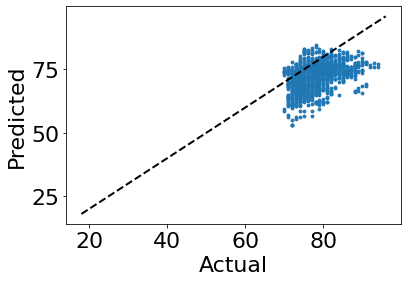

-----------------------------------------------------------
Test dataset is: 9 & test set size: 651 

R_square score on the training: 0.98
Mean squared error: 97.67
Mean absolute error: 8.02
Root mean squared error: 9.88
R_square score on test: 0.72
R_square score on test - model.score: 0.72



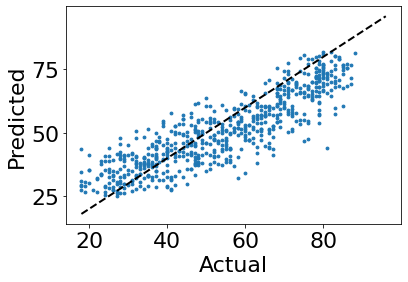

-----------------------------------------------------------
Test dataset is: 4 & test set size: 560 

R_square score on the training: 0.98
Mean squared error: 122.55
Mean absolute error: 8.77
Root mean squared error: 11.07
R_square score on test: 0.55
R_square score on test - model.score: 0.55



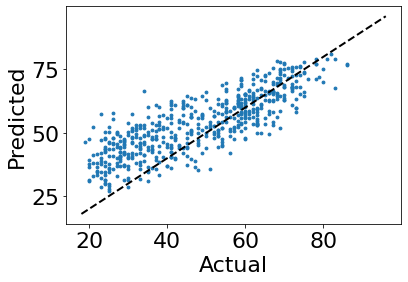

-----------------------------------------------------------
Test dataset is: 8 & test set size: 494 

R_square score on the training: 0.98
Mean squared error: 100.83
Mean absolute error: 8.36
Root mean squared error: 10.04
R_square score on test: 0.67
R_square score on test - model.score: 0.67



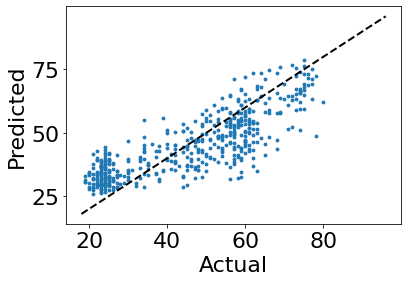

-----------------------------------------------------------
Test dataset is: 5 & test set size: 435 

R_square score on the training: 0.98
Mean squared error: 186.51
Mean absolute error: 11.02
Root mean squared error: 13.66
R_square score on test: 0.71
R_square score on test - model.score: 0.71



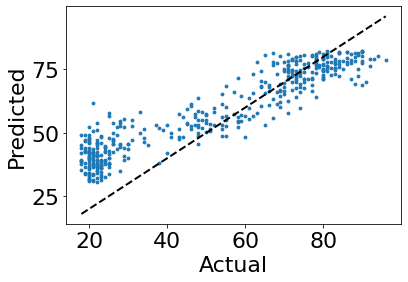

-----------------------------------------------------------
Test dataset is: 2 & test set size: 425 

R_square score on the training: 0.98
Mean squared error: 66.31
Mean absolute error: 6.64
Root mean squared error: 8.14
R_square score on test: 0.76
R_square score on test - model.score: 0.76



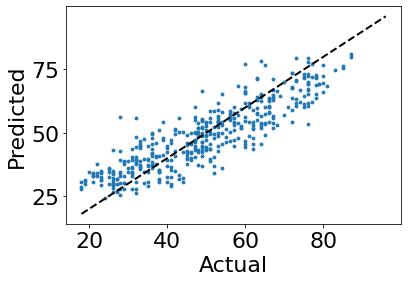

-----------------------------------------------------------
Test dataset is: 7 & test set size: 359 

R_square score on the training: 0.98
Mean squared error: 85.99
Mean absolute error: 7.26
Root mean squared error: 9.27
R_square score on test: -0.40
R_square score on test - model.score: -0.40



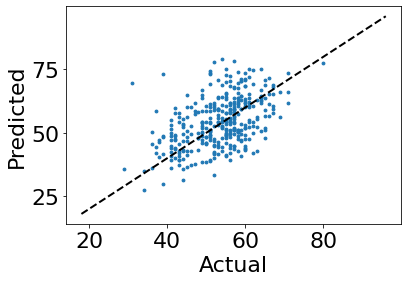

-----------------------------------------------------------
Test dataset is: 3 & test set size: 47 

R_square score on the training: 0.98
Mean squared error: 99.04
Mean absolute error: 8.08
Root mean squared error: 9.95
R_square score on test: -0.24
R_square score on test - model.score: -0.24



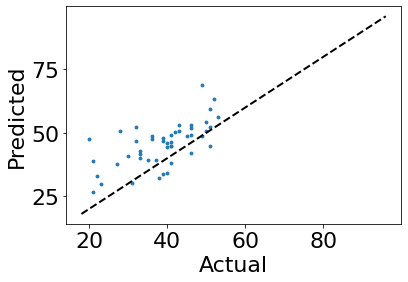

-----------------------------------------------------------
Test dataset is: 6 & test set size: 35 

R_square score on the training: 0.98
Mean squared error: 53.81
Mean absolute error: 5.65
Root mean squared error: 7.34
R_square score on test: 0.26
R_square score on test - model.score: 0.26



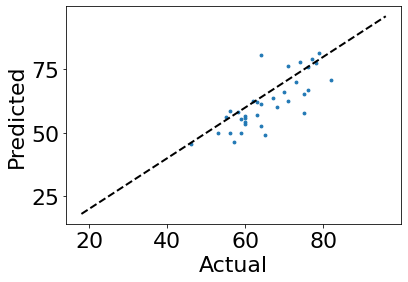

Average K-Fold Score : 0.13446955632002183
Average K-Fold MAE Score : 7.823839920326626
SD of MAE Score : 1.4685670561466193


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
scores = []
MAE = []
std_rf =[]
from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=9)
for train_index, test_index in gkf.split(X, y, groups=groups):
    #print("TRAIN:", train_index,train_index.shape, "TEST:", test_index, test_index.shape)
    print('-----------------------------------------------------------')
    print('Test dataset is:', dataset.iloc[test_index[1]]['dataset'], '& test set size:', sum(dataset['dataset']== dataset.iloc[test_index[1]]['dataset']),'\n')   #Finding dataset number using second elements in testset
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, '\n --', X_test, '\n--', y_train,  '\n--',y_test, '\n')
    regressor = RandomForestRegressor(max_depth = 14, max_features = 13)
    regressor.fit(X_train, y_train)
    #print('Intercept:', regressor.intercept_)
    #print('\n Coefficients: \n', regressor.coef_)
    print('R_square score on the training: %.2f' % regressor.score(X_train, y_train))
    y_pred = regressor.predict(X_test)
    std_rf.append(np.std(y_pred))
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
    print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R_square score on test: %.2f' % r2_score(y_test, y_pred))
    #print('R_square score on test - model.score: %.2f' % regressor.score(y_test.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R_square score on test - model.score: %.2f\n' % regressor.score(X_test, y_test))
    scores.append(r2_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, s=8)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()
    
print('Average K-Fold Score :' , np.mean(scores))
print('Average K-Fold MAE Score :' , np.mean(MAE))
print('SD of MAE Score :' , np.std(MAE))

In [94]:
from statistics import mean
print('SD of predicted values in LR:', mean(std_lr))
print('SD of predicted values in RF:', mean(std_rf))

SD of predicted values in LR: 14.141722257058053
SD of predicted values in RF: 11.303338328881422


### min max scaler on X

In [95]:
X = dataset.iloc[:, 1:139]
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
type(rescaledX)

numpy.ndarray

In [96]:
y = dataset.iloc[:, 139].values

In [104]:
# Convert X back to a Pandas DataFrame, for convenience
X_scaled = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)
#y = dataset.iloc[:, 139].values

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [105]:
X_scaled

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1
0,0.266889,0.130439,0.294306,0.517315,0.305780,0.385517,0.316429,0.391351,0.451096,0.243012,...,0.630546,0.646989,0.643852,0.428509,0.619945,0.427838,0.662904,0.646042,0.507961,0.633233
1,0.267356,0.130678,0.297613,0.516960,0.303479,0.407153,0.358349,0.428490,0.426830,0.258800,...,0.658703,0.654144,0.649303,0.433348,0.607774,0.480226,0.609030,0.650336,0.514535,0.637380
2,0.272088,0.140978,0.300899,0.512415,0.385946,0.440772,0.351457,0.326174,0.457948,0.232810,...,0.631399,0.616577,0.623259,0.416190,0.550452,0.498202,0.590559,0.633524,0.512489,0.635653
3,0.285483,0.132802,0.280392,0.482249,0.435433,0.421825,0.319923,0.322751,0.447319,0.242567,...,0.591297,0.620751,0.618413,0.432908,0.557911,0.451977,0.598769,0.612569,0.482089,0.604455
4,0.303644,0.149247,0.334644,0.483584,0.285685,0.387123,0.310561,0.444349,0.500260,0.248801,...,0.616894,0.616577,0.627498,0.395952,0.592854,0.449923,0.534120,0.621520,0.488423,0.631439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,0.320345,0.070668,0.195751,0.422315,0.249286,0.559369,0.357033,0.333020,0.275108,0.337152,...,0.506826,0.533095,0.702604,0.444787,0.382803,0.548023,0.590046,0.612940,0.524246,0.586719
4222,0.337653,0.121147,0.252635,0.263642,0.216103,0.417189,0.233579,0.309630,0.368665,0.354822,...,0.400171,0.556947,0.629921,0.595249,0.640754,0.443760,0.683940,0.619695,0.362666,0.561246
4223,0.415726,0.220287,0.207109,0.499896,0.238218,0.509353,0.200354,0.381653,0.683733,0.433155,...,0.412116,0.503280,0.413689,0.589529,0.693365,0.386235,0.552591,0.539919,0.442009,0.620932
4224,0.379126,0.177122,0.318717,0.544332,0.320098,0.690470,0.352790,0.418136,0.852416,0.558972,...,0.733788,0.677996,0.694125,0.532336,0.595210,0.586030,0.701385,0.721358,0.485602,0.634270


In [103]:
y

array([85, 85, 86, ..., 84, 80, 86], dtype=int64)

In [107]:
X_new = X_scaled.values

LINEAR REGRESSION
-----------------------------------------------------------
Test dataset is: 1 & test set size: 1220 

Intercept: 51697001718.43309
R_square score on the training: 0.82
Mean squared error: 79.59
Mean absolute error: 7.10
Root mean squared error: 8.92
R_square score on test: -2.45
R_square score on test - model.score: -2.45


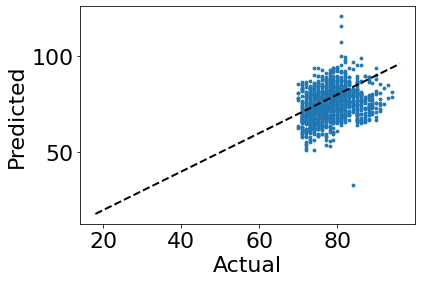

-----------------------------------------------------------
Test dataset is: 9 & test set size: 651 

Intercept: -23871245297944.125
R_square score on the training: 0.87
Mean squared error: 585.06
Mean absolute error: 7.77
Root mean squared error: 24.19
R_square score on test: -0.70
R_square score on test - model.score: -0.70


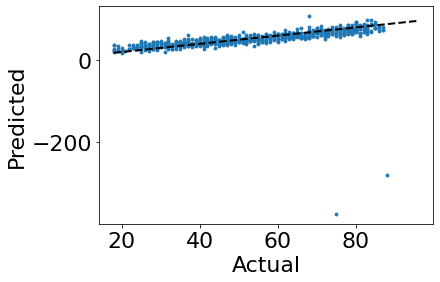

-----------------------------------------------------------
Test dataset is: 4 & test set size: 560 

Intercept: -54950276257.808426
R_square score on the training: 0.87
Mean squared error: 80.32
Mean absolute error: 7.00
Root mean squared error: 8.96
R_square score on test: 0.71
R_square score on test - model.score: 0.71


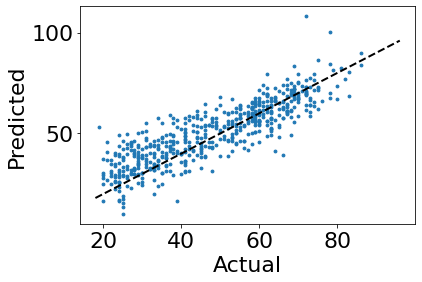

-----------------------------------------------------------
Test dataset is: 8 & test set size: 494 

Intercept: -15784707608.176678
R_square score on the training: 0.86
Mean squared error: 72.67
Mean absolute error: 6.84
Root mean squared error: 8.52
R_square score on test: 0.76
R_square score on test - model.score: 0.76


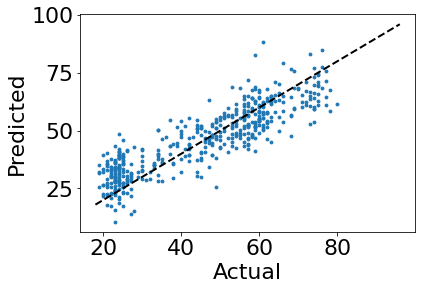

-----------------------------------------------------------
Test dataset is: 5 & test set size: 435 

Intercept: -89034854642995.56
R_square score on the training: 0.86
Mean squared error: 147.51
Mean absolute error: 9.93
Root mean squared error: 12.15
R_square score on test: 0.77
R_square score on test - model.score: 0.77


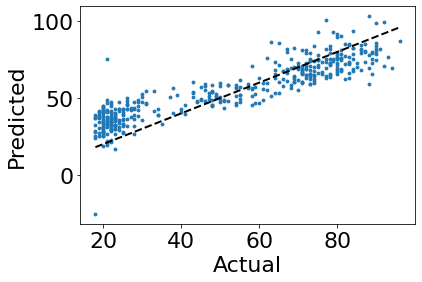

-----------------------------------------------------------
Test dataset is: 2 & test set size: 425 

Intercept: 63608481456.611275
R_square score on the training: 0.86
Mean squared error: 59.50
Mean absolute error: 6.12
Root mean squared error: 7.71
R_square score on test: 0.79
R_square score on test - model.score: 0.79


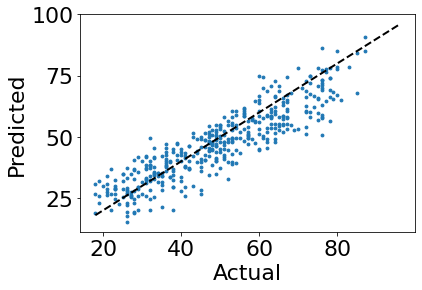

-----------------------------------------------------------
Test dataset is: 7 & test set size: 359 

Intercept: 302414756076.7422
R_square score on the training: 0.87
Mean squared error: 68.24
Mean absolute error: 6.67
Root mean squared error: 8.26
R_square score on test: -0.11
R_square score on test - model.score: -0.11


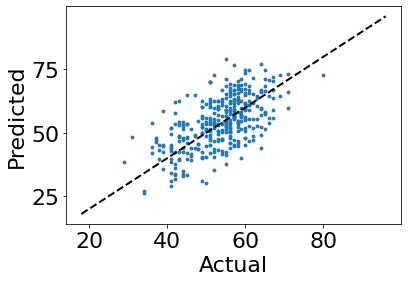

-----------------------------------------------------------
Test dataset is: 3 & test set size: 47 

Intercept: 3625206972082.454
R_square score on the training: 0.86
Mean squared error: 162.61
Mean absolute error: 10.16
Root mean squared error: 12.75
R_square score on test: -1.04
R_square score on test - model.score: -1.04


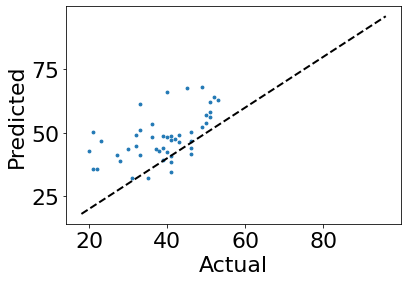

-----------------------------------------------------------
Test dataset is: 6 & test set size: 35 

Intercept: 30792197870.288944
R_square score on the training: 0.86
Mean squared error: 41.05
Mean absolute error: 5.21
Root mean squared error: 6.41
R_square score on test: 0.44
R_square score on test - model.score: 0.44


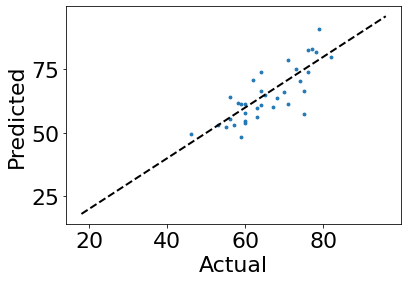

Average K-Fold Score : -0.09399525308677392
Average K-Fold MAE Score : 7.421748709243207
SD of MAE Score : 1.5533098276341795


In [115]:
print('LINEAR REGRESSION')
scores = []
MAE = []
std_lr=[]
residuals = []
from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=9)
for train_index, test_index in gkf.split(X_new, y, groups=groups):
    #print("TRAIN:", train_index,train_index.shape, "TEST:", test_index, test_index.shape)
    print('-----------------------------------------------------------')
    print('Test dataset is:', dataset.iloc[test_index[1]]['dataset'], '& test set size:', sum(dataset['dataset']== dataset.iloc[test_index[1]]['dataset']),'\n')   #Finding dataset number using second elements in testset
    X_train, X_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, '\n --', X_test, '\n--', y_train,  '\n--',y_test, '\n')
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print('Intercept:', regressor.intercept_)
    #print('\n Coefficients: \n', regressor.coef_)
    print('R_square score on the training: %.2f' % regressor.score(X_train, y_train))
    y_pred = regressor.predict(X_test)
    std_lr.append(np.std(y_pred))
    residuals.append(np.subtract(y_pred, y_test))
    
    #printing metrics for test
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
    print("Root mean squared error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R_square score on test: %.2f' % r2_score(y_test, y_pred))
    #print('R_square score on test - model.score: %.2f' % regressor.score(y_test.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R_square score on test - model.score: %.2f' % regressor.score(X_test, y_test))
    scores.append(r2_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, s=8)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()
    
print('Average K-Fold Score :' , np.mean(scores))
print('Average K-Fold MAE Score :' , np.mean(MAE))
print('SD of MAE Score :' , np.std(MAE))

In [111]:
print(residuals)

[array([-12.41590881, -18.40699768, -20.84657288, ...,   0.85771179,
        -0.99916077,   4.16337585]), array([ 8.18750000e+00,  9.06250000e+00,  3.84375000e+00,  1.39062500e+01,
        3.12500000e-02,  1.25625000e+01,  1.01640625e+01,  7.65625000e+00,
        5.98437500e+00,  5.59375000e+00,  1.81562500e+01,  1.98125000e+01,
        1.62812500e+01,  4.23437500e+00, -4.46875000e+00,  1.02187500e+01,
       -2.81250000e-01,  9.01562500e+00,  3.43750000e-01,  7.68750000e+00,
        3.03125000e+00,  1.56250000e+01,  3.53906250e+00,  1.41718750e+01,
        3.43750000e+00,  9.45312500e+00,  1.30937500e+01,  5.20312500e+00,
        1.61875000e+01,  1.32968750e+01,  5.09375000e+00,  5.93750000e-01,
        4.53125000e-01,  2.32812500e+00,  1.59375000e+00,  1.84218750e+01,
        5.42187500e+00,  7.15625000e+00,  7.75000000e+00,  7.40625000e+00,
        1.51250000e+01,  6.71875000e+00,  1.03906250e+01,  9.00000000e+00,
        3.92187500e+00,  5.81250000e+00,  5.91406250e+00, -1.73437500

In [116]:
residuals

[array([-12.41590881, -18.40699768, -20.84657288, ...,   0.85771179,
         -0.99916077,   4.16337585]),
 array([ 8.18750000e+00,  9.06250000e+00,  3.84375000e+00,  1.39062500e+01,
         3.12500000e-02,  1.25625000e+01,  1.01640625e+01,  7.65625000e+00,
         5.98437500e+00,  5.59375000e+00,  1.81562500e+01,  1.98125000e+01,
         1.62812500e+01,  4.23437500e+00, -4.46875000e+00,  1.02187500e+01,
        -2.81250000e-01,  9.01562500e+00,  3.43750000e-01,  7.68750000e+00,
         3.03125000e+00,  1.56250000e+01,  3.53906250e+00,  1.41718750e+01,
         3.43750000e+00,  9.45312500e+00,  1.30937500e+01,  5.20312500e+00,
         1.61875000e+01,  1.32968750e+01,  5.09375000e+00,  5.93750000e-01,
         4.53125000e-01,  2.32812500e+00,  1.59375000e+00,  1.84218750e+01,
         5.42187500e+00,  7.15625000e+00,  7.75000000e+00,  7.40625000e+00,
         1.51250000e+01,  6.71875000e+00,  1.03906250e+01,  9.00000000e+00,
         3.92187500e+00,  5.81250000e+00,  5.91406250e+00

In [118]:
output=[]
for i in range(9):
   output.append(np.mean(residuals[i]))

In [119]:
output

[-3.3015216764856556,
 -1.534814228110599,
 2.533532169886998,
 1.1603519115370777,
 3.5110991379310343,
 -1.9888140330595128,
 0.777161494603064,
 9.394178025265957,
 -0.6945814950125558]

In [121]:
np.std(output)

3.5877320953745855